# polinomio


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

arquivo = pd.ExcelFile('RP-polinomial.xlsx')

dados = pd.read_excel(arquivo,'tabela')

dados.describe()

,dose,repeticao,peso
count,28.000000,28.00000,28.000000
mean,150.000000,2.50000,156.396429
std,101.835015,1.13855,10.234599
min,0.000000,1.00000,132.300000
25%,50.000000,1.75000,150.375000
50%,150.000000,2.50000,159.100000
75%,250.000000,3.25000,161.400000
max,300.000000,4.00000,172.700000


C:\Users\jmartins\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\jmartins\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)


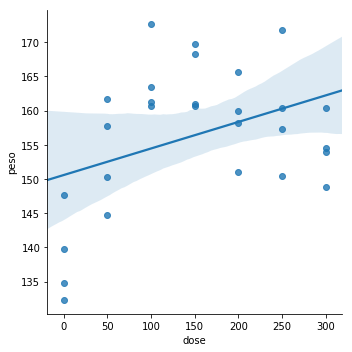

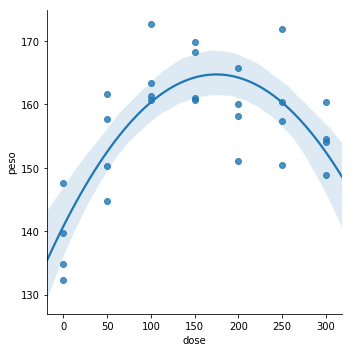

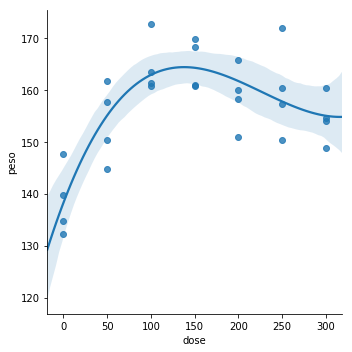

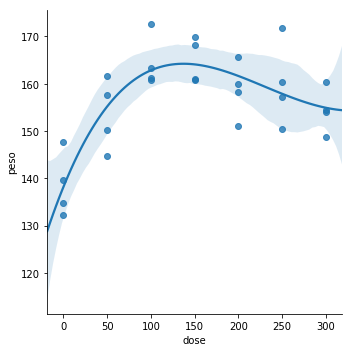

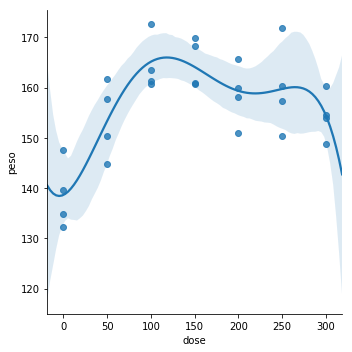

In [12]:
import seaborn as sns

sns.lmplot(x='dose',y='peso',data = dados, order=1)
sns.lmplot(x='dose',y='peso',data = dados, order=2)
sns.lmplot(x='dose',y='peso',data = dados, order=3)
sns.lmplot(x='dose',y='peso',data = dados, order=4)
sns.lmplot(x='dose',y='peso',data = dados, order=5)

In [14]:
import numpy as np
import matplotlib as mpl
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix

dose = dados['dose']
peso = dados['peso']

x = np.array(dose)
y = np.array(peso)

In [23]:
from numpy import *
from scipy.interpolate import *

p1 = polyfit(x,y,1)
p2 = polyfit(x,y,2)
p3 = polyfit(x,y,3)
p4 = polyfit(x,y,4)
p5 = polyfit(x,y,5)


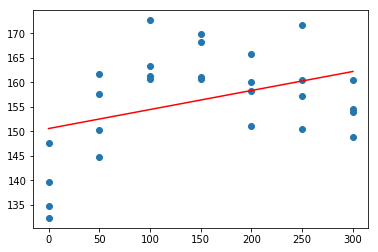

In [22]:
plt.plot(x,y,'o')
plt.plot(x,polyval(p1,x),'r-')

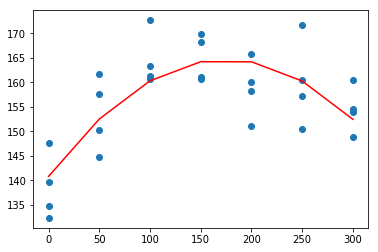

In [24]:
plt.plot(x,y,'o')
plt.plot(x,polyval(p2,x),'r-')

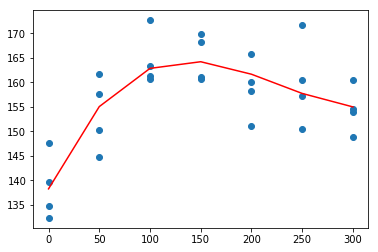

In [25]:
plt.plot(x,y,'o')
plt.plot(x,polyval(p3,x),'r-')

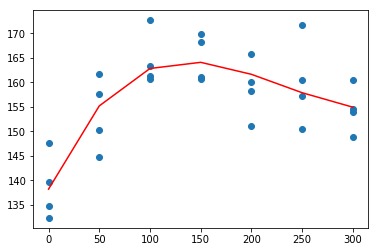

In [26]:
plt.plot(x,y,'o')
plt.plot(x,polyval(p4,x),'r-')

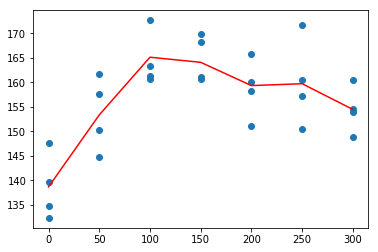

In [27]:
plt.plot(x,y,'o')
plt.plot(x,polyval(p5,x),'r-')

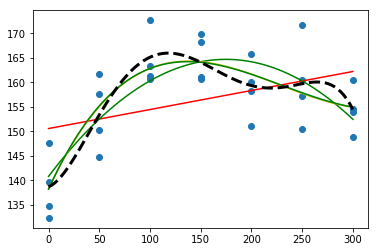

In [30]:
xnovo = linspace(0,300,100)
plt.plot(x,y,'o')
plt.plot(xnovo,polyval(p1,xnovo),'r-')
plt.plot(xnovo,polyval(p2,xnovo),'g-')
plt.plot(xnovo,polyval(p3,xnovo),'y-')
plt.plot(xnovo,polyval(p4,xnovo),'g-')
plt.plot(xnovo,polyval(p5,xnovo),'k--',lw=3)

In [35]:
yest1 = polyval(p1,x)

yest2 = polyval(p2,x)

yest3 = polyval(p3,x)

yest4 = polyval(p4,x)

yest5 = polyval(p5,x)


In [36]:
yresid = y-yest1
SSresid = sum(pow(yresid,2))
SStotal = len(y)*var(y)
r2_1=1-SSresid/SStotal

r2_1

0.14962128458903545

In [37]:
yresid = y-yest2
SSresid = sum(pow(yresid,2))
SStotal = len(y)*var(y)
r2_2=1-SSresid/SStotal

r2_2

0.6042768701362251

In [38]:
yresid = y-yest3
SSresid = sum(pow(yresid,2))
SStotal = len(y)*var(y)
r2_3=1-SSresid/SStotal

r2_3

0.6590973675764129

In [39]:
yresid = y-yest4
SSresid = sum(pow(yresid,2))
SStotal = len(y)*var(y)
r2_4=1-SSresid/SStotal

r2_4

0.6591884962233026

In [40]:
yresid = y-yest5
SSresid = sum(pow(yresid,2))
SStotal = len(y)*var(y)
r2_5=1-SSresid/SStotal

r2_5

0.684373144716091

#RMSE

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse1 = sqrt(mean_squared_error(y,yest1))
rmse2 = sqrt(mean_squared_error(y,yest2))
rmse3 = sqrt(mean_squared_error(y,yest3))
rmse4 = sqrt(mean_squared_error(y,yest4))
rmse5 = sqrt(mean_squared_error(y,yest5))

In [42]:
rmse5

5.646257580356136

Text(0.5,0,'Grau do Polinomio')

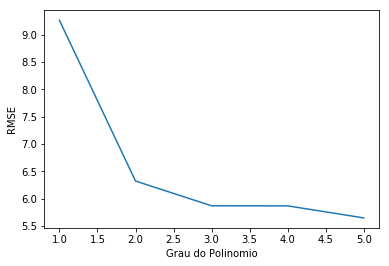

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1,2,3,4,5],[rmse1,rmse2,rmse3,rmse4,rmse5])
ax.set_ylabel('RMSE')
ax.set_xlabel('Grau do Polinomio')